# EDA on survey data


1. [Mapping strings to a numeric scale](#section1)
2. [Heatmaps](#section2)
3. [One-hot encoding](#section3)
4. [Splitting data fields](#section4)
5. [Melting into long format](#section5)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Mapping strings to a numeric scale

Some data comes from surveys. This is an example of a survey on fitness

In [2]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/fitness.csv'
fit_df = pd.read_csv(url)
fit_df.head(2)

,index,Date,Gender,Age,ImportanceExercise,FitnessLevel,Frequency,Barriers,Activity,DoYouDo,Daytime,Unit,Diet,BarriersDiet,SelfRatingDiet,RecommendedFriend,PurchasedEquipment,Motivation
0,0,2019/07/03 11:48:07 PM GMT+5:30,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,1,2019/07/03 11:51:22 PM GMT+5:30,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...


In [3]:
fit_df.shape

(545, 18)

In [4]:
fit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               545 non-null    int64 
 1   Date                545 non-null    object
 2   Gender              545 non-null    object
 3   Age                 545 non-null    object
 4   ImportanceExercise  545 non-null    int64 
 5   FitnessLevel        545 non-null    object
 6   Frequency           545 non-null    object
 7   Barriers            545 non-null    object
 8   Activity            545 non-null    object
 9   DoYouDo             545 non-null    object
 10  Daytime             545 non-null    object
 11  Unit                545 non-null    object
 12  Diet                545 non-null    object
 13  BarriersDiet        545 non-null    object
 14  SelfRatingDiet      545 non-null    int64 
 15  RecommendedFriend   545 non-null    object
 16  PurchasedEquipment  545 no

---
### <span style="color:blue"> Exercise:</span>
> Find the different possible values for `FitnessLevel`, `Diet`, `Daytime` and `DoYouDo'`
> 
> Which of these can we map to numbers?


We will map the FitnessLevel and diet strings to numbers (why these fields?):

In [9]:
fitness_mapping = {
    'Unfit': 1,
    'Average': 2,
    'Good': 3,
    'Very good': 4,
    'Perfect': 5
}
fit_df['FitnessLevel_numeric'] = fit_df['FitnessLevel'].map(fitness_mapping)

In [10]:
diet_mapping = {
    'No': 1,
    'Not always': 2,
    'Yes': 3
}
fit_df['Diet_numeric'] = fit_df['Diet'].map(diet_mapping)

sanity check:

In [11]:
fit_df[['FitnessLevel','FitnessLevel_numeric','Diet', 'Diet_numeric', 'DoYouDo','SelfRatingDiet']]

,FitnessLevel,FitnessLevel_numeric,Diet,Diet_numeric,DoYouDo,SelfRatingDiet
0,Good,3,Not always,2,I don't really exercise,3
1,Very good,4,Not always,2,With a group,4
2,Good,3,Not always,2,Alone,4
3,Good,3,Yes,3,Alone,4
4,Unfit,1,Yes,3,I don't really exercise,4
...,...,...,...,...,...,...
540,Perfect,5,Not always,2,Alone,4
541,Average,2,Yes,3,I don't really exercise,3
542,Average,2,Not always,2,Alone,4
543,Good,3,Not always,2,Alone,3


## 2. Heatmaps

Heatmaps can be used to map correlations between numeric features. 

<AxesSubplot: >

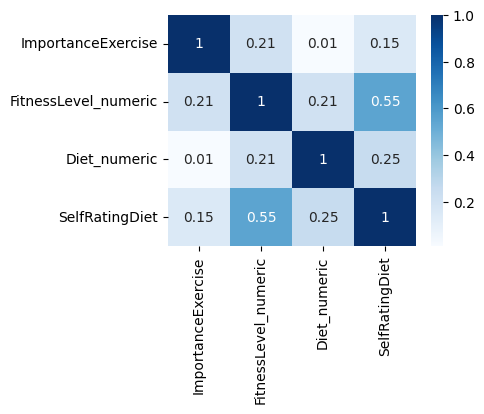

In [12]:
plt.figure(figsize=(4,3))
correlation_matrix = fit_df[['ImportanceExercise', 'FitnessLevel_numeric','Diet_numeric', 'SelfRatingDiet']].corr().round(2)
sns.heatmap(data=correlation_matrix,cmap='Blues', annot=True)

## 3. One-hot encoding

In [13]:
features = ['ImportanceExercise', 'FitnessLevel_numeric','Diet_numeric', 'SelfRatingDiet', 'DoYouDo', 'Daytime']
small_fit = pd.get_dummies(fit_df[features])
small_fit

,ImportanceExercise,FitnessLevel_numeric,Diet_numeric,SelfRatingDiet,DoYouDo_Alone,DoYouDo_I don't really exercise,DoYouDo_With a friend,DoYouDo_With a group,DoYouDo_Within a class environment,Daytime_Afternoon,Daytime_Early morning,Daytime_Evening
0,2,3,2,3,0,1,0,0,0,0,1,0
1,4,4,2,4,0,0,0,1,0,0,1,0
2,3,3,2,4,1,0,0,0,0,0,1,0
3,4,3,3,4,1,0,0,0,0,0,0,1
4,3,1,3,4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3,5,2,4,1,0,0,0,0,0,0,1
541,1,2,3,3,0,1,0,0,0,0,1,0
542,4,2,2,4,1,0,0,0,0,0,1,0
543,3,3,2,3,1,0,0,0,0,0,0,1


<AxesSubplot: >

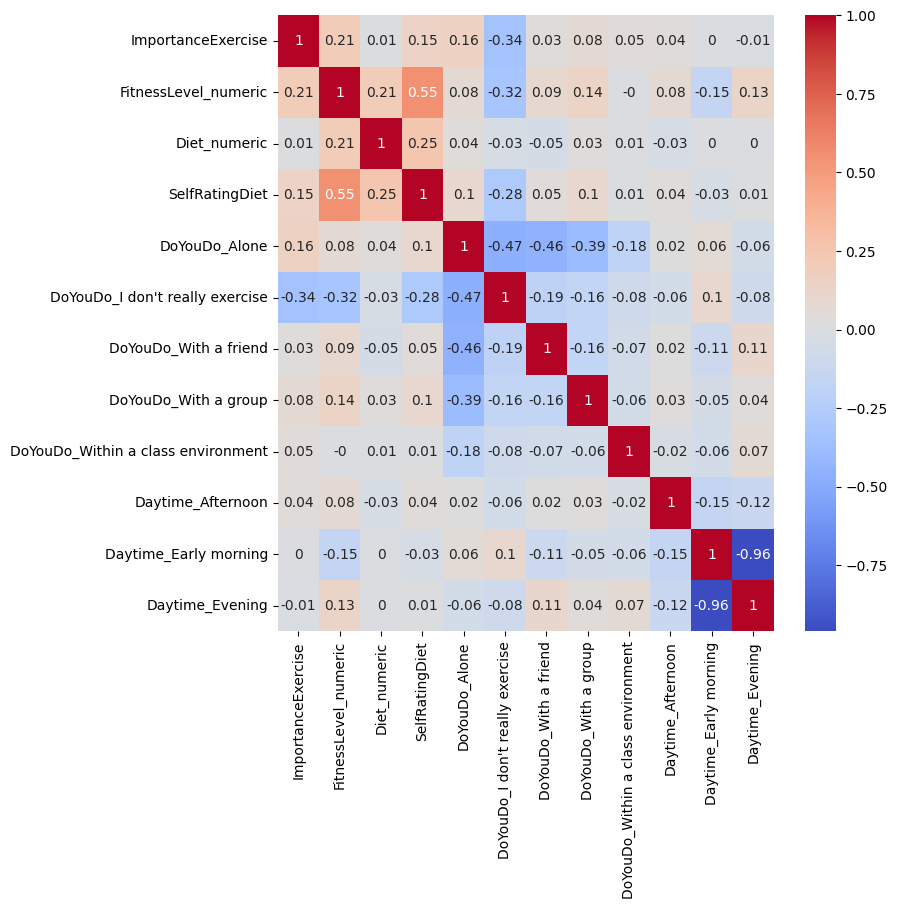

In [14]:
plt.figure(figsize=(8,8))
correlation_matrix = small_fit.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

## 4. Splitting data fields

Split the exercise column according to ';'

n indicates how many splits to perform

In [15]:
list_exs = fit_df["Activity"].str.split(";", n = 6, expand = True)
list_exs

,0,1,2,3,4,5,6
0,I don't really exercise,None,None,None,None,None,None
1,Walking or jogging,Swimming,None,None,None,None,None
2,Walking or jogging,None,None,None,None,None,None
3,Walking or jogging,Gym,Lifting weights,None,None,None,None
4,I don't really exercise,None,None,None,None,None,None
...,...,...,...,...,...,...,...
540,Walking or jogging,None,None,None,None,None,None
541,Walking or jogging,Gym,Swimming,None,None,None,None
542,Walking or jogging,Yoga,None,None,None,None,None
543,Walking or jogging,None,None,None,None,None,None


Do we need more splits? 

Also - note that the columns are numbered, like the rows. No column names.

In [16]:
fit_df.Activity.str.count(';').max()

6

In [17]:
list_exs[6].unique()

array([None, 'Team sport'], dtype=object)

Add these new columns with the exercises to the dataframe

In [18]:
fit_df["choice1"]= list_exs[0]
fit_df["choice2"]= list_exs[1]
fit_df["choice3"]= list_exs[2]
fit_df["choice4"]= list_exs[3]

In [19]:
fit_df.head(2)

,index,Date,Gender,Age,ImportanceExercise,FitnessLevel,Frequency,Barriers,Activity,DoYouDo,...,SelfRatingDiet,RecommendedFriend,PurchasedEquipment,Motivation,FitnessLevel_numeric,Diet_numeric,choice1,choice2,choice3,choice4
0,0,2019/07/03 11:48:07 PM GMT+5:30,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,...,3,Yes,No,I'm sorry ... I'm not really interested in exe...,3,2,I don't really exercise,None,None,None
1,1,2019/07/03 11:51:22 PM GMT+5:30,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,...,4,Yes,No,I want to be fit;I want to be flexible;I want ...,4,2,Walking or jogging,Swimming,None,None


We now want to view some stats on the diffent exercise. But the data is in wide format.

Wide format: each row has one `key`: one person, one occurance

Long format: each row has more than one `key`: one person per date, one occurance per person, one person per date per site

## 5. Melting into long format

Lets unite exercise1, exercise2 and exercise 3 into one column. 

We use 'melt'. 



This is in wide format:

In [20]:
features = ['index','ImportanceExercise', 'FitnessLevel_numeric','Diet_numeric', 'SelfRatingDiet', 'choice1','choice2', 'choice3', 'choice4']

In [21]:
fit_df[features]

,index,ImportanceExercise,FitnessLevel_numeric,Diet_numeric,SelfRatingDiet,choice1,choice2,choice3,choice4
0,0,2,3,2,3,I don't really exercise,None,None,None
1,1,4,4,2,4,Walking or jogging,Swimming,None,None
2,2,3,3,2,4,Walking or jogging,None,None,None
3,3,4,3,3,4,Walking or jogging,Gym,Lifting weights,None
4,4,3,1,3,4,I don't really exercise,None,None,None
...,...,...,...,...,...,...,...,...,...
540,540,3,5,2,4,Walking or jogging,None,None,None
541,541,1,2,3,3,Walking or jogging,Gym,Swimming,None
542,542,4,2,2,4,Walking or jogging,Yoga,None,None
543,543,3,3,2,3,Walking or jogging,None,None,None


This is in long format:

In [22]:
ids = ['index','ImportanceExercise', 'FitnessLevel','FitnessLevel_numeric','Diet_numeric', 'SelfRatingDiet']
values = ['choice1','choice2', 'choice3', 'choice4']

In [23]:
melted_df = pd.melt(fit_df, id_vars= ids, value_vars= values)
melted_df.head()

,index,ImportanceExercise,FitnessLevel,FitnessLevel_numeric,Diet_numeric,SelfRatingDiet,variable,value
0,0,2,Good,3,2,3,choice1,I don't really exercise
1,1,4,Very good,4,2,4,choice1,Walking or jogging
2,2,3,Good,3,2,4,choice1,Walking or jogging
3,3,4,Good,3,3,4,choice1,Walking or jogging
4,4,3,Unfit,1,3,4,choice1,I don't really exercise


Rename columns:

In [24]:
melted_df = melted_df.rename(columns={'variable':'choice','value':'exercise'})
melted_df.head()

,index,ImportanceExercise,FitnessLevel,FitnessLevel_numeric,Diet_numeric,SelfRatingDiet,choice,exercise
0,0,2,Good,3,2,3,choice1,I don't really exercise
1,1,4,Very good,4,2,4,choice1,Walking or jogging
2,2,3,Good,3,2,4,choice1,Walking or jogging
3,3,4,Good,3,3,4,choice1,Walking or jogging
4,4,3,Unfit,1,3,4,choice1,I don't really exercise


Each id appears a few times (how many times?)

In [25]:
melted_df.loc[melted_df['index']== 4]

,index,ImportanceExercise,FitnessLevel,FitnessLevel_numeric,Diet_numeric,SelfRatingDiet,choice,exercise
4,4,3,Unfit,1,3,4,choice1,I don't really exercise
549,4,3,Unfit,1,3,4,choice2,None
1094,4,3,Unfit,1,3,4,choice3,None
1639,4,3,Unfit,1,3,4,choice4,None


finally.. we can look at the categories

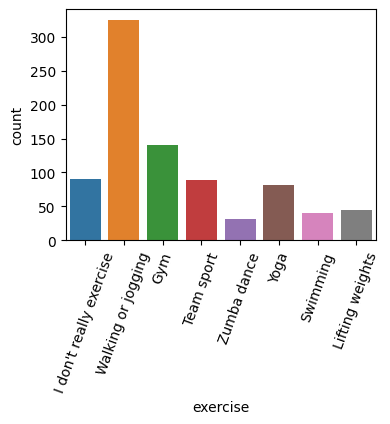

In [26]:
plt.figure(figsize=(4,3))
sns.countplot(data = melted_df, x = 'exercise')
plt.xticks(rotation=70)
plt.show()

Now lets look at the fitness level:

In [27]:
group_df = melted_df.groupby('exercise')[['FitnessLevel_numeric']].mean()
group_df

,FitnessLevel_numeric
exercise,
Gym,2.864286
I don't really exercise,2.033333
Lifting weights,3.111111
Swimming,2.926829
Team sport,3.056180
Walking or jogging,2.709877
Yoga,2.728395
Zumba dance,2.645161


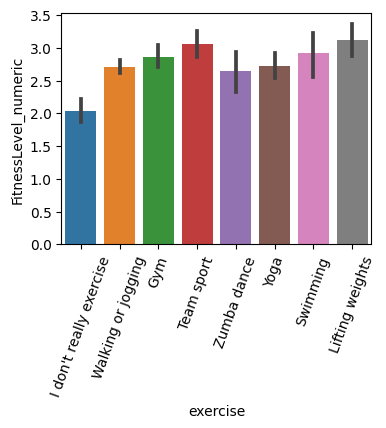

In [28]:
plt.figure(figsize=(4,3))
sns.barplot(data = melted_df, x='exercise', y='FitnessLevel_numeric')
plt.xticks(rotation=70)
plt.show()

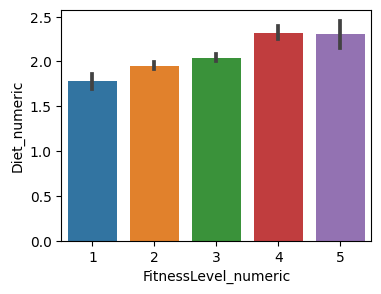

In [52]:
plt.figure(figsize=(4,3))
sns.barplot(data=melted_df, x='FitnessLevel_numeric', y='Diet_numeric')
plt.show()

We can see a certain connection between fitness and diet.

The correlation we found is not high (0.21). Let's try to break it down by exercises:

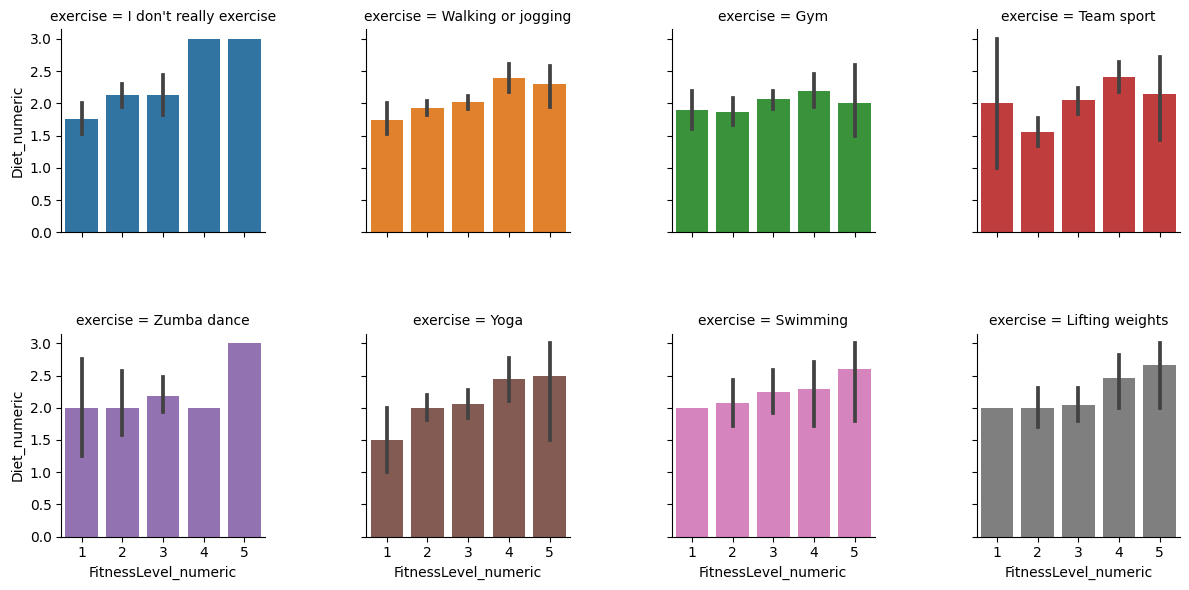

In [57]:
g = sns.FacetGrid(data = melted_df, col="exercise", hue="exercise", col_wrap=4)
g.map_dataframe(sns.barplot, x='FitnessLevel_numeric', y = "Diet_numeric")
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

We see that the fit people (5) are more concerned with their diet, especially the ones that Zumba dance, don't exercise  or lift weights. 

We can drill down to analyze Zumba dancers. 

In [53]:
zumba_df = melted_df[melted_df.exercise == "Zumba dance"]

<AxesSubplot: >

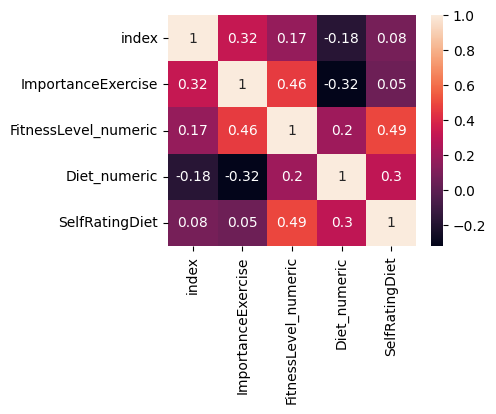

In [55]:
plt.figure(figsize=(4,3))
correlation_matrix = zumba_df.corr(numeric_only = True).round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Is this it? No.. this is only the beginning.

Which exercises are often done together?

Who thinks exercise is important? etc.

---
> ##### Summary
>
>* `.rename` - alter axes (columns or rows) labels
>
>* `str.split(";", n = 6, expand = True)` - split strings around given separator/delimiter. When expand=True, expand the split stirngs to seperate columns
>
>* `pd.melt` - long format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’
>
>* `replace` - replace values
>
> * `sns.barplot` - shows mean and confidence intervals 
>
>* `sns.scatterplot` - a scatter plot
>
>* `plt.xticks(rotation=70)` - rotate the labels on the x-axis of a plot
>
>* `sns.FacetGrid` - show different aspects (Facets) of the data, on a grid
>
>* `map_datframe` - plots a function on the grid
---